In [1]:
import pandas as pd
import seaborn as sns

import os

from statsmodels.graphics.gofplots import qqplot_2samples

import sklearn


%matplotlib inline

with open('parcel_data_list.txt') as f:
    parcel_data_list = f.read()

print(parcel_data_list.split())

['city_data/anchorage.csv', 'city_data/atlanta.csv', 'city_data/austin.csv', 'city_data/boston.csv', 'city_data/buffalo.csv', 'city_data/denver.csv', 'city_data/detroit.csv', 'city_data/durham.csv', 'city_data/madison.csv', 'city_data/milwaukee.csv', 'city_data/minneapolis.csv', 'city_data/newark.csv', 'city_data/philadelphia.csv', 'city_data/raleigh.csv', 'city_data/san_francisco.csv', 'city_data/santa_monica.csv', 'city_data/washoe_reno.csv', 'city_data/wichita.csv']


In [24]:
all_paths = parcel_data_list.split()
all_cities = [os.path.basename(path).split('.')[0] for path in all_paths]

paths_and_cities = zip(all_paths, all_cities)



#def create_df(path):
#    if os.path.isfile(path):
#    df = pd.read_csv(path)

 
all_df = {p[1]: pd.read_csv(p[0]) for p in paths_and_cities}

In [3]:
age_value_cols = {'anchorage': ['Year Built', 'Appraised Total Value'],
 'atlanta': ['RESYRBLT','TOT_APPR'],
 'austin': ['YR_BUILT', 'APPRAISED_'],
 'boston': ['YR_BUILT', 'AV_TOTAL'],
 'buffalo': ['YEAR BUILT', 'TOTAL VALUE'],
 'denver': ['CCYRBLT', 'TOTAL_VALUE'],
 'detroit': ['Year Built', 'Taxable Value'],
 'durham': ['ACTUAL_YEAR_BUILT','TOTAL_ASS_VALUE'],
 'madison': ['YearBuilt', 'CurrentTotal'],
 'milwaukee': ['YR_BUILT','C_A_TOTAL'],
 'minneapolis': ['YEARBUILT','TOTALVALUE'],
 'newark': ['YearBuilt', 'TotalValue'],
 'philadelphia': ['year_built', 'market_value'],
 'raleigh': ['YEAR_BUILT', 'TOTAL_VALUE_ASSD'],
 'san_francisco': ['Year Property Built', 'Assessed Personal Property Value'],
 'santa_monica': ['YearBuilt','TotalValue'],
 'washoe_reno': ['YEARBLT','TOTALASS'],
 'wichita': ['YrBuilt', 'TotVal']}

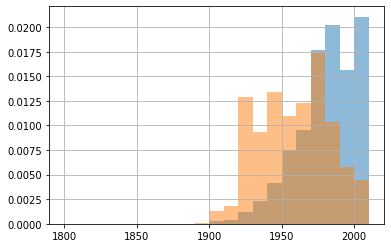

In [32]:
all_df['austin']['YR_BUILT'].hist(bins=range(1800, 2020, 10), density=True, alpha=0.5)
all_df['santa_monica']['YearBuilt'].hist(bins=range(1800, 2020, 10), density=True, alpha=0.5)

In [5]:
import numpy as np

for key, df in all_df.items():
    #df[age_value_cols[key]] = df[age_value_cols[key]].replace(0, np.nan)
    df.dropna(subset=age_value_cols[key], inplace=True)

In [34]:
flint_data = pd.read_csv('city_data/z_data_flint.csv', encoding='latin-1')
flint_data.columns

Index(['Index', 'street', 'zipcode', 'city', 'state', 'latitude', 'longitude',
       'useCode', 'taxAssessmentYear', 'taxAssessment', 'yearBuilt',
       'Accessed', 'Address'],
      dtype='object')

In [7]:
#all_df['philadelphia']['year_built'] = all_df['philadelphia']['year_built'].astype(str).astype(float, errors = 'ignore')

#qqplot_2samples(all_df['philadelphia']['year_built'].values, all_df['boston']['YR_BUILT'].values)

<Figure size 1440x720 with 0 Axes>

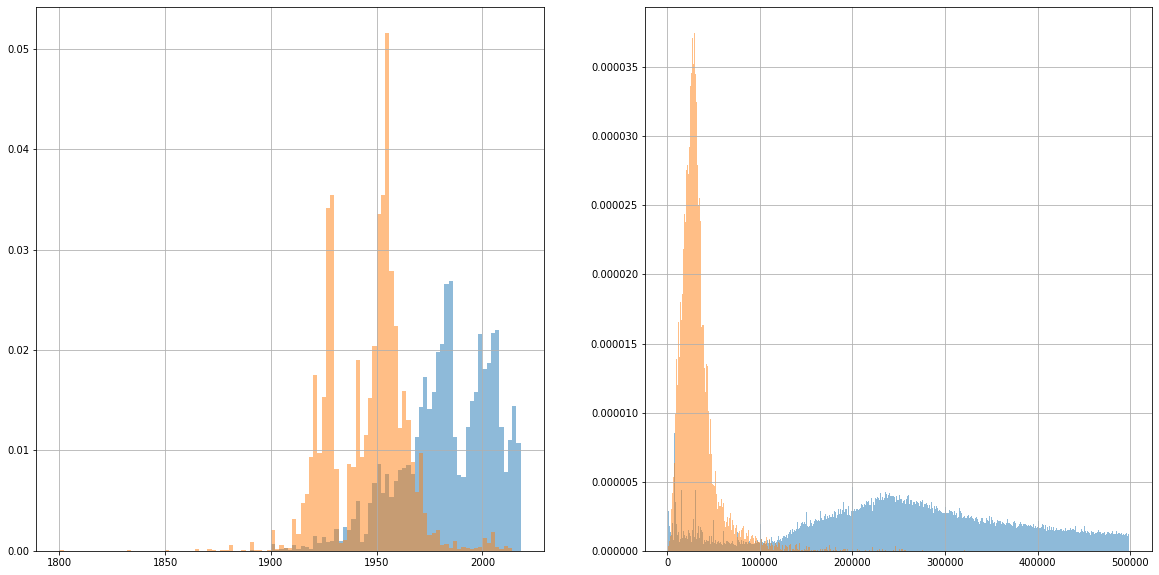

In [73]:
#all_df['philadelphia']['year_built']

plt.figure(figsize=(20,10))

def year_histogram(municipality):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    axes = all_df[municipality][age_value_cols[municipality][0]].hist(bins=range(1800, 2020, 2), density=True, alpha=0.5)
    flint_data['yearBuilt'].hist(bins=range(1800, 2020, 2), density=True, alpha=0.5)
    plt.subplot(1, 2, 2)
    all_df[municipality][age_value_cols[municipality][1]].hist(bins=range(1000, 500000, 1000),density=True, alpha=0.5)
    flint_data['taxAssessment'].hist(bins=range(1000, 500000, 1000),density=True, alpha=0.5)

year_histogram('austin')

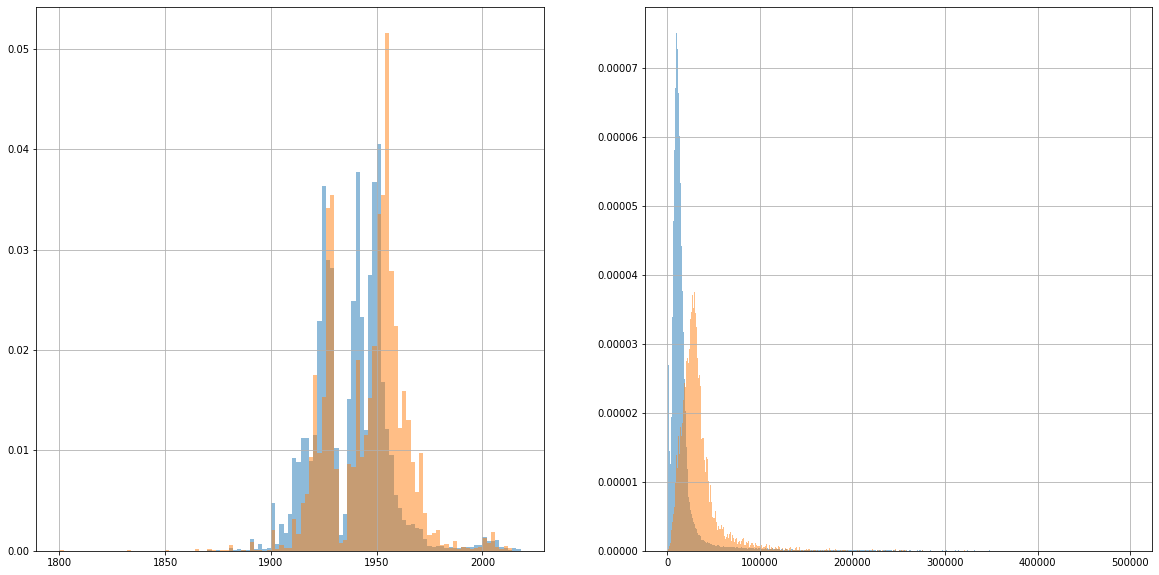

In [68]:
year_histogram('detroit')

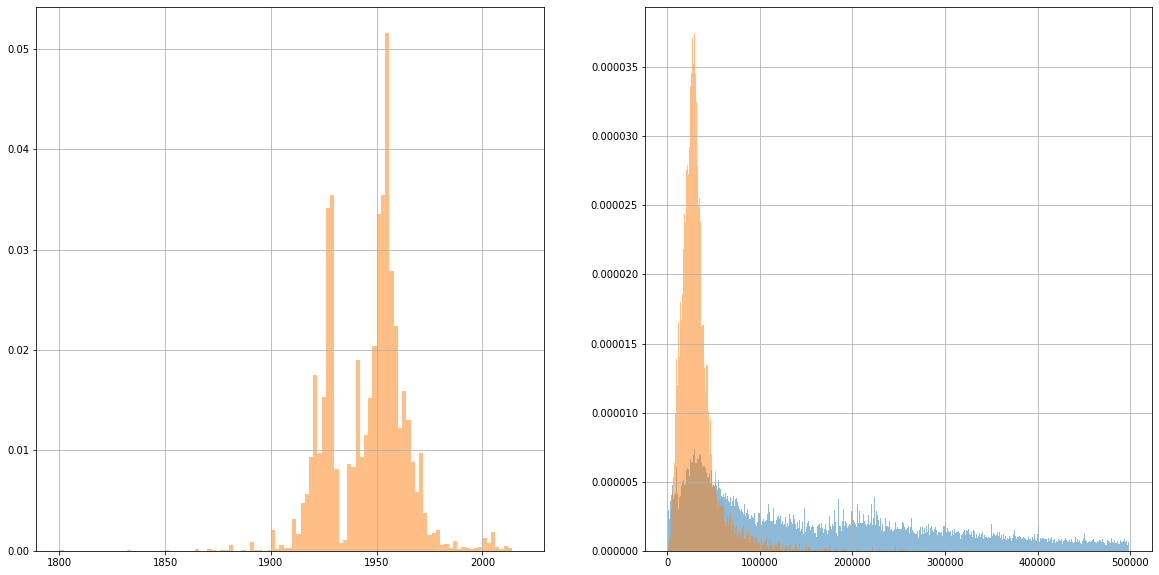

In [76]:
year_histogram('atlanta')

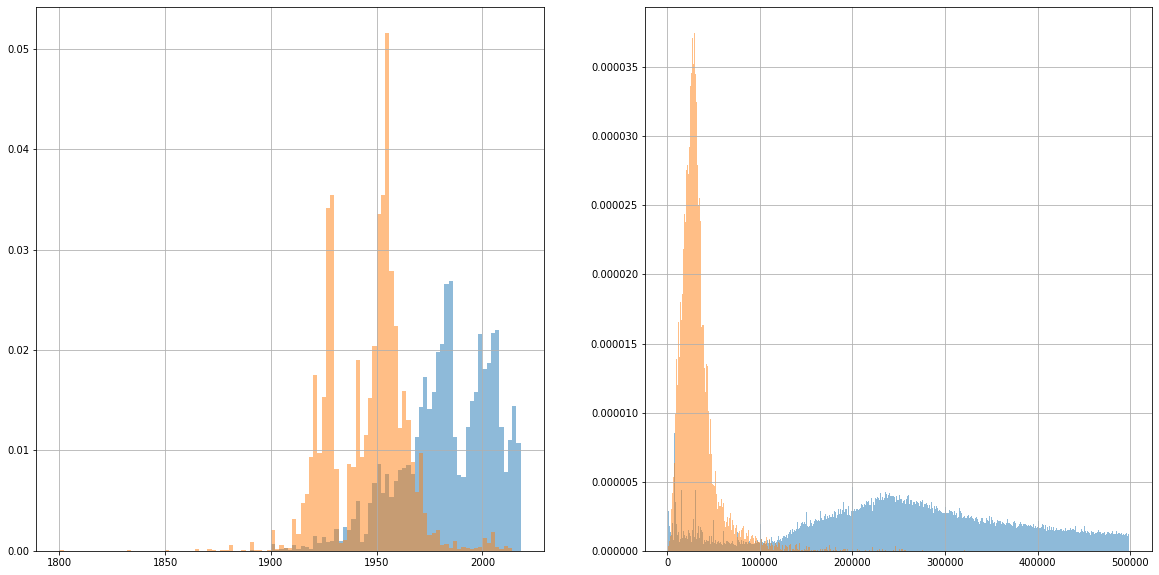

In [77]:
year_histogram('austin')

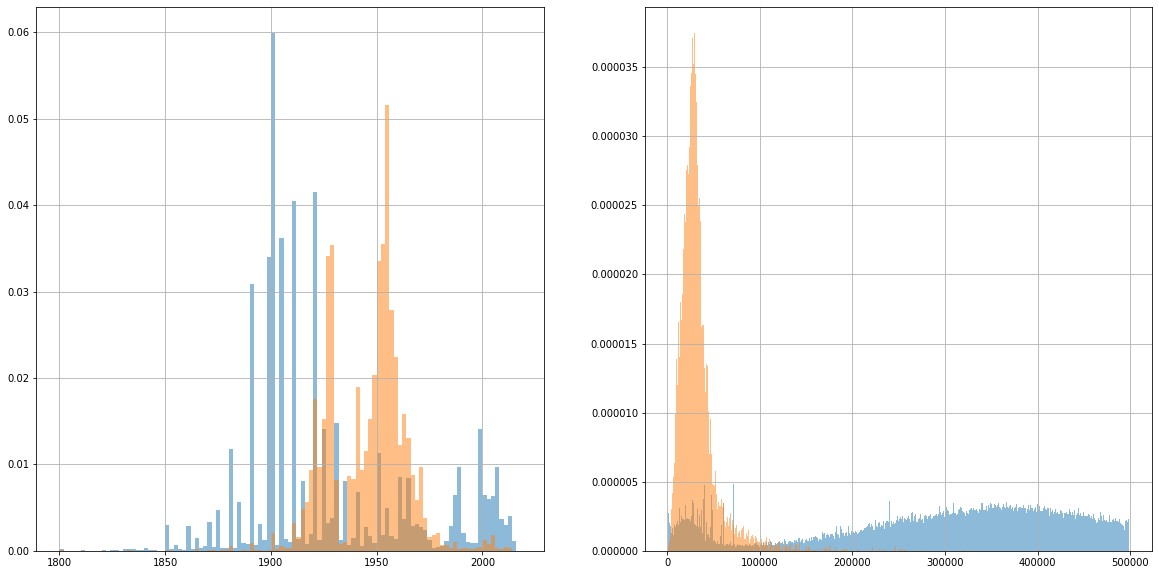

In [78]:
year_histogram('boston')

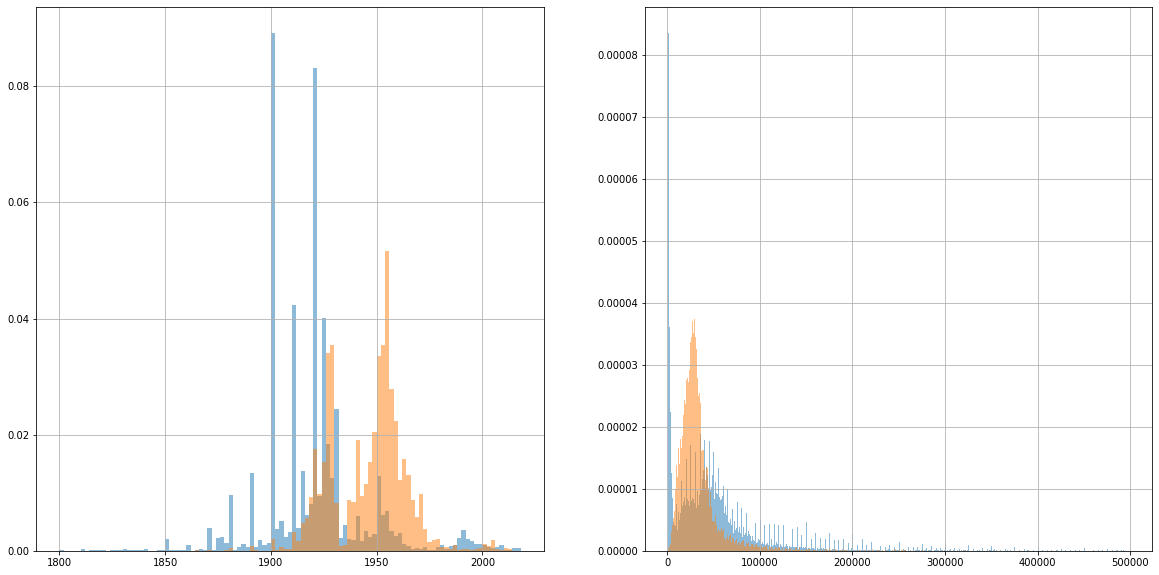

In [79]:
year_histogram('buffalo')

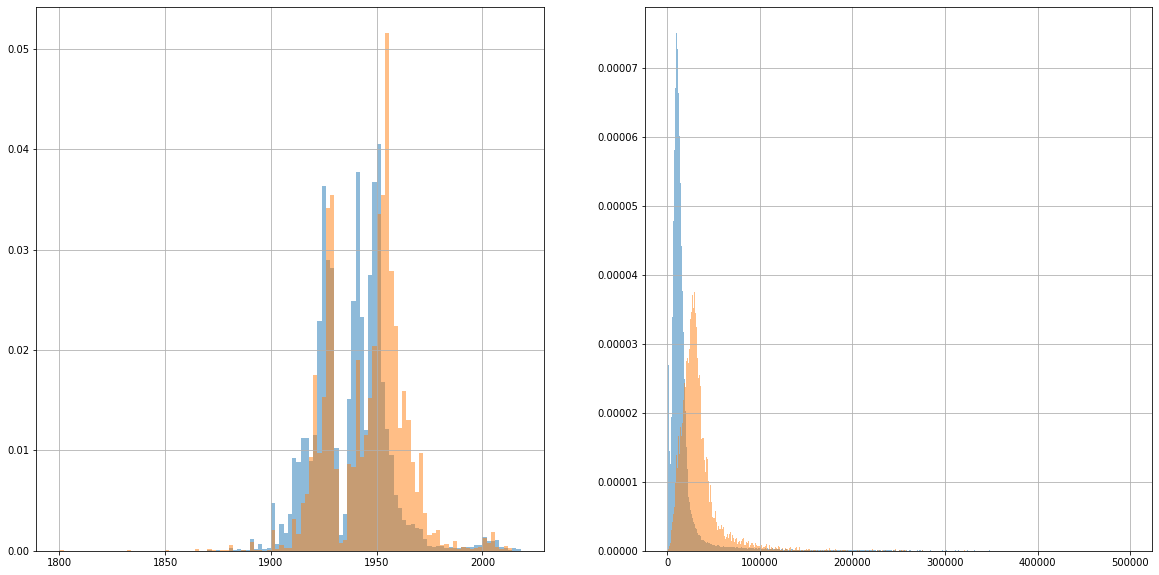

In [82]:
year_histogram('detroit')

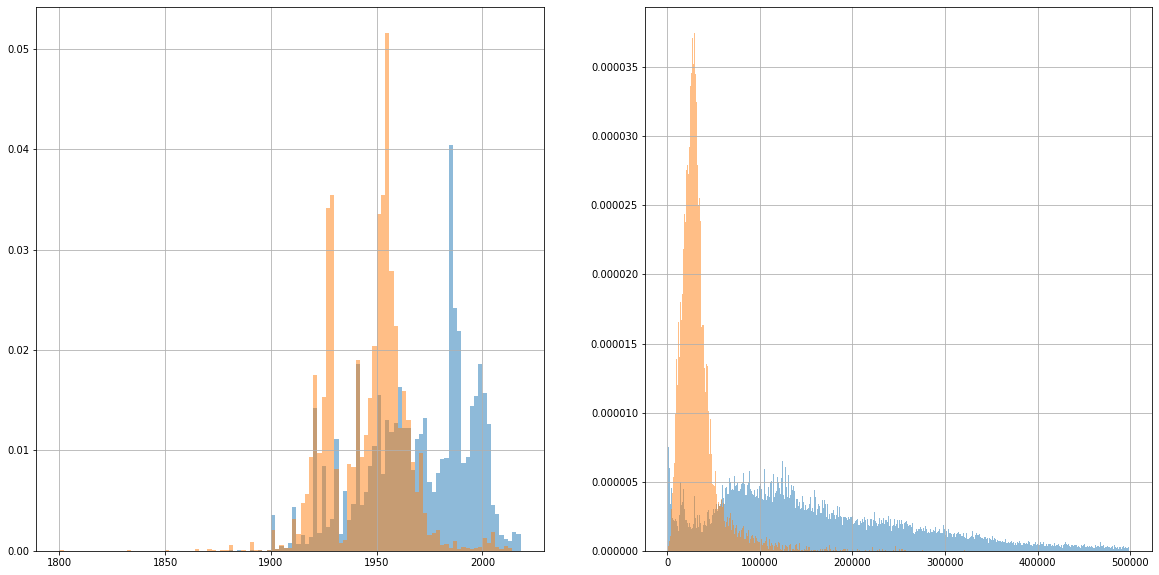

In [83]:
year_histogram('durham')

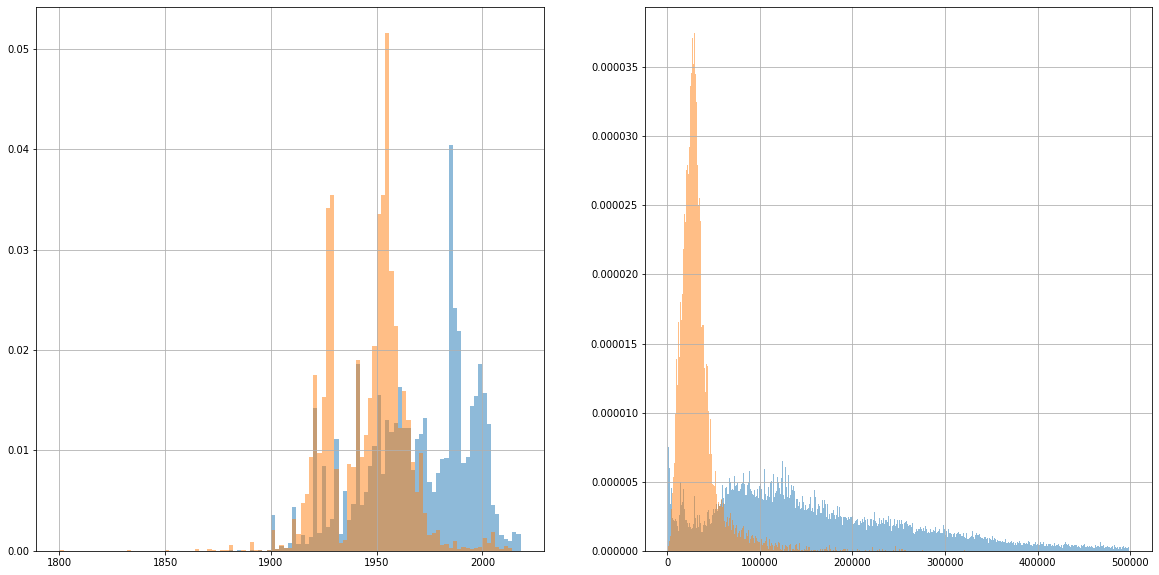

In [89]:
year_histogram('durham')

In [90]:
age_value_cols.keys()

dict_keys(['anchorage', 'atlanta', 'austin', 'boston', 'buffalo', 'denver', 'detroit', 'durham', 'madison', 'milwaukee', 'minneapolis', 'newark', 'philadelphia', 'raleigh', 'san_francisco', 'santa_monica', 'washoe_reno', 'wichita'])

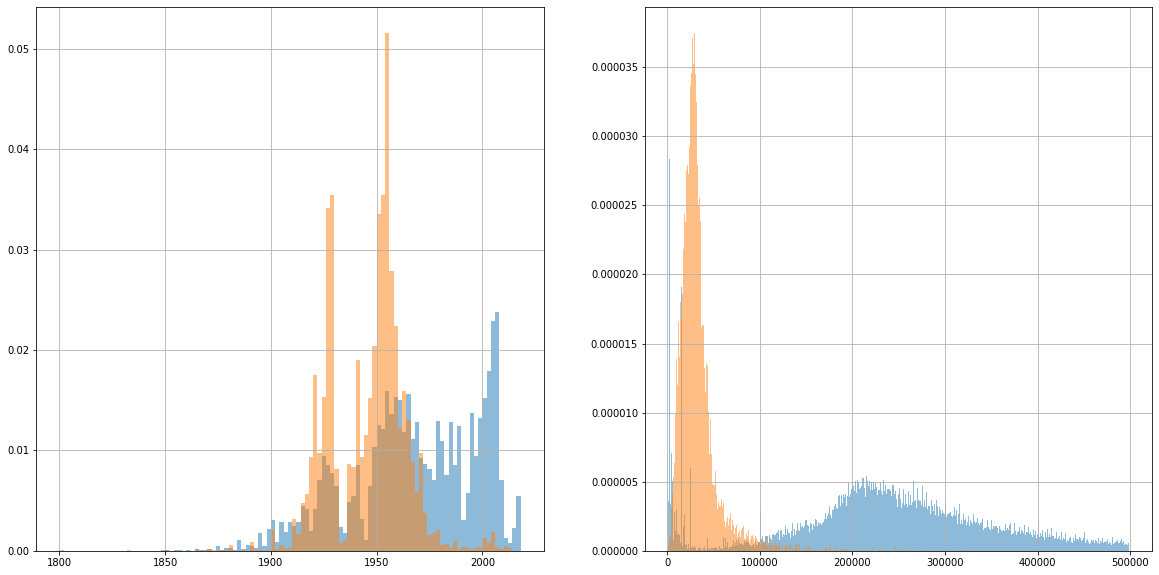

In [94]:
year_histogram('madison')

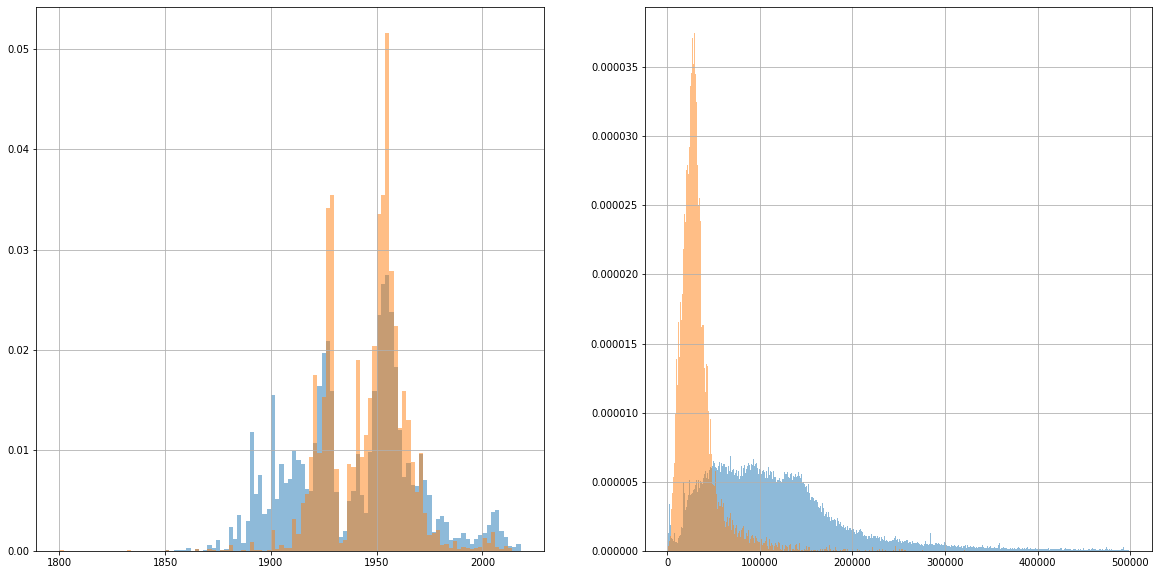

In [93]:
year_histogram('milwaukee')

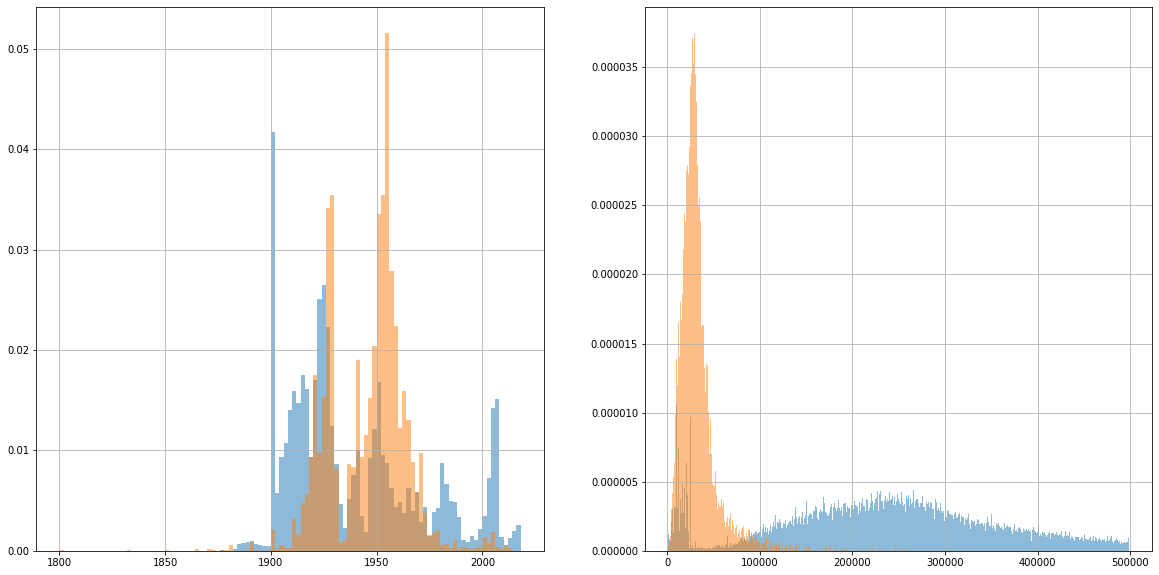

In [92]:
year_histogram('minneapolis')

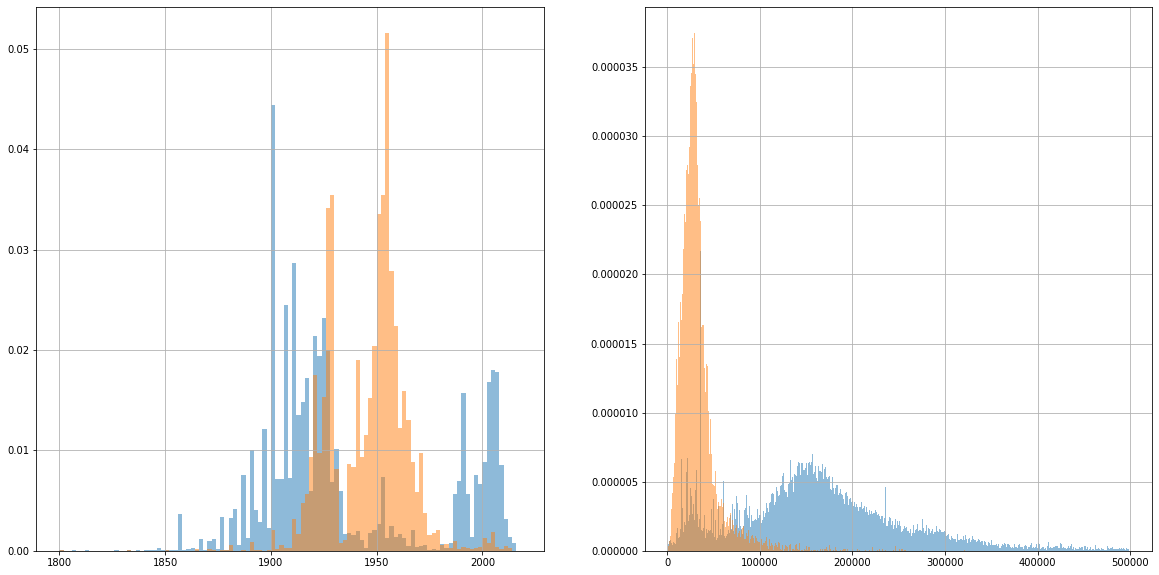

In [91]:
year_histogram('newark')

C:\Users\gushi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


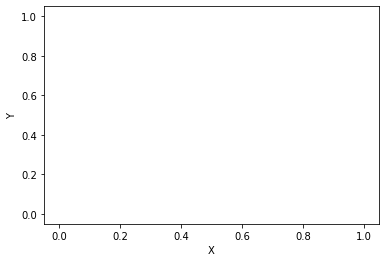

In [84]:
import numbers

import numpy as np
import matplotlib.pyplot as plt


def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, rug=False,
           rug_length=0.05, rug_kwargs=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.

    Parameters
    ----------
    x, y : array-like
        One-dimensional numeric arrays.

    ax : matplotlib.axes.Axes, optional
        Axes on which to plot. If not provided, the current axes will be used.

    quantiles : int or array-like, optional
        Quantiles to include in the plot. This can be an array of quantiles, in
        which case only the specified quantiles of `x` and `y` will be plotted.
        If this is an int `n`, then the quantiles will be `n` evenly spaced
        points between 0 and 1. If this is None, then `min(len(x), len(y))`
        evenly spaced quantiles between 0 and 1 will be computed.

    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        Specify the interpolation method used to find quantiles when `quantiles`
        is an int or None. See the documentation for numpy.quantile().

    rug : bool, optional
        If True, draw a rug plot representing both samples on the horizontal and
        vertical axes. If False, no rug plot is drawn.

    rug_length : float in [0, 1], optional
        Specifies the length of the rug plot lines as a fraction of the total
        vertical or horizontal length.

    rug_kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.axvline() and
        matplotlib.axes.Axes.axhline() when drawing rug plots.

    kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
        the q-q plot.
    """
    # Get current axes if none are provided
    if ax is None:
        ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation=interpolation)
    y_quantiles = np.quantile(y, quantiles, interpolation=interpolation)
    #print(x_quantiles)
    #print(y_quantiles)

    # Draw the rug plots if requested
    if rug:
        # Default rug plot settings
        rug_x_params = dict(ymin=0, ymax=rug_length, c='gray', alpha=0.5)
        rug_y_params = dict(xmin=0, xmax=rug_length, c='gray', alpha=0.5)

        # Override default setting by any user-specified settings
        if rug_kwargs is not None:
            rug_x_params.update(rug_kwargs)
            rug_y_params.update(rug_kwargs)

        # Draw the rug plots
        for point in x:
            ax.axvline(point, **rug_x_params)
        for point in y:
            ax.axhline(point, **rug_y_params)

    # Draw the q-q plot
    ax.scatter(x_quantiles, y_quantiles, **kwargs)
    
# Setup

# Draw quantile-quantile plot
plt.figure()
qqplot(all_df['atlanta']['RESYRBLT'].values, all_df['boston']['YR_BUILT'].values, quantiles = 1000, c='r', alpha=0.5, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [85]:
all_df['atlanta']['RESYRBLT'].values

array([nan, nan, nan, ..., nan, nan, nan])

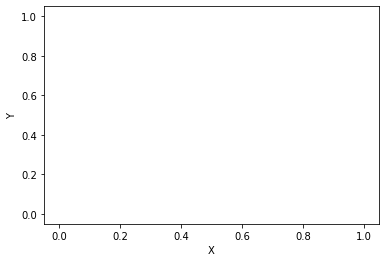

In [86]:
# Setup

# Draw quantile-quantile plot
plt.figure()
qqplot(all_df['atlanta']['RESYRBLT'].values, all_df['boston']['YR_BUILT'].values, quantiles = 1000, c='r', alpha=0.5, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [87]:
all_df['atlanta']['RESYRBLT']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
          ..
165451   NaN
165452   NaN
165453   NaN
165454   NaN
165455   NaN
165456   NaN
165457   NaN
165458   NaN
165459   NaN
165460   NaN
165461   NaN
165462   NaN
165463   NaN
165464   NaN
165465   NaN
165466   NaN
165467   NaN
165468   NaN
165469   NaN
165470   NaN
165471   NaN
165472   NaN
165473   NaN
165474   NaN
165475   NaN
165476   NaN
165477   NaN
165478   NaN
165479   NaN
165480   NaN
Name: RESYRBLT, Length: 165481, dtype: float64

In [88]:
# Example 2: samples of different lengths
n_u = 50  # Number of U samples to draw
n_v = 100  # Number of V samples to draw
u = rng.normal(size=n_u)  # Sample 1: U ~ N(0, 1)
v = rng.standard_t(df=5, size=n_v)  # Sample 2: V ~ t(5)

# Draw quantile-quantile plot
plt.figure()
qqplot(u, v, c='r', alpha=0.5, edgecolor='k')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Two samples of different lengths')
plt.show()
plt.close()

NameError: name 'rng' is not defined